# Dinamikai rendszerek 2019/2020 EF


# #6 Feladatlap
------

## Külalak, formázás  (10 pont)  

## 6.1 Feladat (90 pont)
----

Adott az alábbi kétdimenziós dinamikai rendszer:
$$
\begin{align}
\dot{x}&=y\\
\dot{y}&=-\gamma y-\frac{\mathrm{d}V(x)}{\mathrm{d}x},
\end{align}
$$
ahol a pontenciál alakja a következő:
$$
V(x)=\tanh \left(\frac{(x-x_1)^2}{z_1^2}\right)\tanh\left(\frac{(x-x_2)^2}{z_2^2}\right).
$$
A pontenciál minimumai $x_1,~x_2$. A paraméterek $x_1=1,~x_2=-2,~z_1=2,~z_2=4,~\gamma=1$.  

 
  
  
 

  


**a)** Ábrázoljuk a potenciált az $x$ függvényében! (*10 pont*)

In [2]:
function V(x,x1,x2,z1,z2)
    return tanh((x-x1)^2/z1^2)*tanh((x-x2)^2/z2^2)
end

V (generic function with 1 method)

In [3]:
using Plots; using LaTeXStrings;
Plots.reset_defaults(); theme(:default); Plots.scalefontsizes(2.); Plots.default(:fontfamily, "serif")
gr(fmt=:png) # Make it a PNG instead of an SVG since there's a lot of points!

Plots.GRBackend()

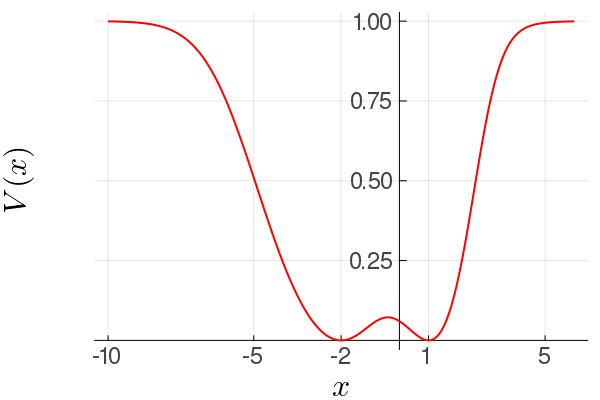

In [4]:
x_arr = -10:0.01:6
plot(x_arr,V.(x_arr,1,-2,2,4), lw=2, color=:red)
plot!(xlabel=L"x", ylabel=L"V(x)", xticks=[-10,-5,-2,0,1,5], legend=nothing, framestyle=:origin)

**b)** Deriváljuk $x$ szerint a potenciált és ábrázoljuk az eredményt $x$ függvényében! (*10 pont*)

In [5]:
function derV(x,x1,x2,z1,z2)
    return (1-(tanh((x-x1)^2/z1^2))^2)*2*(x-x1)/z1^2*tanh((x-x2)^2/z2^2) + (1-(tanh((x-x2)^2/z2^2))^2)*2*(x-x2)/z2^2*tanh((x-x1)^2/z1^2)
end

derV (generic function with 1 method)

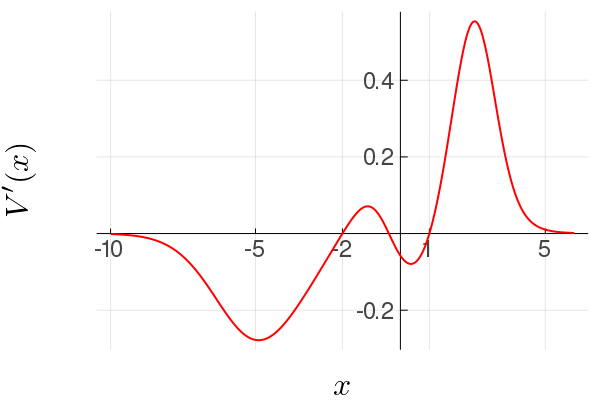

In [6]:
x_arr = -10:0.01:6
plot(x_arr,derV.(x_arr,1,-2,2,4), lw=2, color=:red)
plot!(xlabel=L"x", ylabel=L"V'(x)", xticks=[-10,-5,-2,0,1,5], legend=nothing, framestyle=:origin)

In [7]:
x_max_arr = -2:0.001:1
x_max_arr[findmax(V.(x_max_arr,1,-2,2,4))[2]]


-0.397

**c)** Rajzoljuk fel a rendszer fázisportréját, megoldva a rendszert 100 tetszőleges kezdeti állapot felhasználásával! (*10 pont*)

In [8]:
#using Pkg; Pkg.add("ParameterizedFunctions")

In [9]:
using DifferentialEquations; using ParameterizedFunctions; using BenchmarkTools

In [10]:
f! = @ode_def Lienard begin
  dx = y
  dy = -γ*y - (1-(tanh((x-x1)^2/z1^2))^2)*2*(x-x1)/z1^2*tanh((x-x2)^2/z2^2) - (1-(tanh((x-x2)^2/z2^2))^2)*2*(x-x2)/z2^2*tanh((x-x1)^2/z1^2)
end γ x1 x2 z1 z2

(::Lienard{getfield(Main, Symbol("##3#7")),getfield(Main, Symbol("##4#8")),getfield(Main, Symbol("##5#9")),Nothing,Nothing,getfield(Main, Symbol("##6#10")),Expr,Expr}) (generic function with 2 methods)

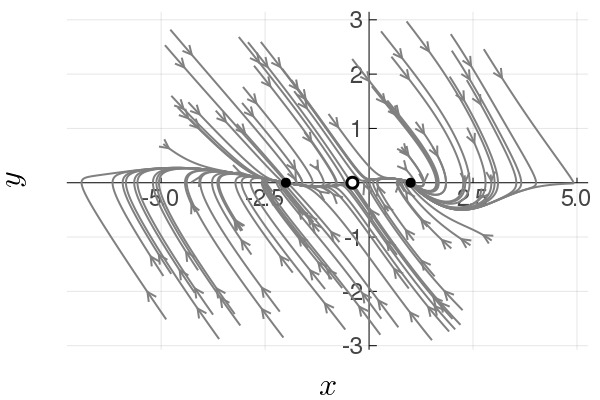

In [11]:
p = (1.0,1.0,-2.0,2.0,4.0)
pl = plot()
for i in 1:100
    # first segment of the trajectories - before the arrow
    tspan = (0.0,0.2)
    u0 = [rand(-5:0.001:3),rand(-3:0.001:3)]
    prob = ODEProblem(f!,u0,tspan,p)
    sol = solve(prob, saveat=0.01)
    pl = plot!(sol[1,:], sol[2,:], legend=false, color=:grey, lw=1.5, arrow=:arrow)
    # second segment of the trajectories - after the arrow
    tspan = (0.0,50.0)
    u0 = [sol[1,end],sol[2,end]]
    prob = ODEProblem(f!,u0,tspan,p)
    sol = solve(prob, saveat=0.01)
    pl = plot!(sol[1,:], sol[2,:], legend=false, color=:grey, lw=1.5, )
end
pl = plot!([1,-2],[0,0], seriestype=:scatter, marker=(5, :black), framestyle=:origin)
pl = plot!([-0.4],[0], seriestype=:scatter, marker=(5, :white, stroke(3, :black)), framestyle=:origin)
pl = plot!(xlabel=L"x", ylabel=L"y")
display(pl)

**d)** Tekintsünk négyzetrácson elhelyezkedő kezedeti állapotokat a $[1,2]\times[-2,-1]$ tartományból (51* 51 pont, pl.`1:0.02:2`)! Ábrázoljuk a pontokat a `scatter` függvény segítségével! (*10 pont*)

In [12]:
N = 51;

In [13]:
x0_arr = collect(range(1,2,length=N));
y0_arr = collect(range(-2,-1,length=N));

In [14]:
xy_0_mat = [ [i, j] for i in range(1,2,length=N), j in range(-2,-1,length=N)]

51×51 Array{Array{Float64,1},2}:
 [1.0, -2.0]   [1.0, -1.98]   [1.0, -1.96]   …  [1.0, -1.02]   [1.0, -1.0] 
 [1.02, -2.0]  [1.02, -1.98]  [1.02, -1.96]     [1.02, -1.02]  [1.02, -1.0]
 [1.04, -2.0]  [1.04, -1.98]  [1.04, -1.96]     [1.04, -1.02]  [1.04, -1.0]
 [1.06, -2.0]  [1.06, -1.98]  [1.06, -1.96]     [1.06, -1.02]  [1.06, -1.0]
 [1.08, -2.0]  [1.08, -1.98]  [1.08, -1.96]     [1.08, -1.02]  [1.08, -1.0]
 [1.1, -2.0]   [1.1, -1.98]   [1.1, -1.96]   …  [1.1, -1.02]   [1.1, -1.0] 
 [1.12, -2.0]  [1.12, -1.98]  [1.12, -1.96]     [1.12, -1.02]  [1.12, -1.0]
 [1.14, -2.0]  [1.14, -1.98]  [1.14, -1.96]     [1.14, -1.02]  [1.14, -1.0]
 [1.16, -2.0]  [1.16, -1.98]  [1.16, -1.96]     [1.16, -1.02]  [1.16, -1.0]
 [1.18, -2.0]  [1.18, -1.98]  [1.18, -1.96]     [1.18, -1.02]  [1.18, -1.0]
 [1.2, -2.0]   [1.2, -1.98]   [1.2, -1.96]   …  [1.2, -1.02]   [1.2, -1.0] 
 [1.22, -2.0]  [1.22, -1.98]  [1.22, -1.96]     [1.22, -1.02]  [1.22, -1.0]
 [1.24, -2.0]  [1.24, -1.98]  [1.24, -1.96]     [1.24, 

In [15]:
#xy_0_arr = reshape(xy_0_mat,:,1);

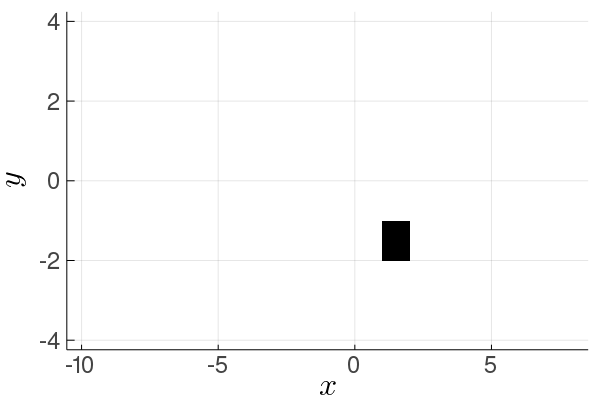

In [16]:
pl = scatter()
for i in 1:N
    for j in 1:N
        pl = scatter!([x0_arr[i]], [y0_arr[j]], markersize=0.1, markercolor=:black, legend=false)
    end
end
pl = scatter!(xlim=[-10,8], ylim=[-4,4], xlabel=L"x", ylabel=L"y")
display(pl)

**e)** Oldjuk meg a rendszert a **d)** alpontban definiált pontokból kiindulva és egységnyi időként ábrázoljuk a pontokat egy grafikonon így kimutatva a fázistér kontrakcióját!  (*20 pont*)

In [17]:
sol[end][2]

UndefVarError: UndefVarError: sol not defined

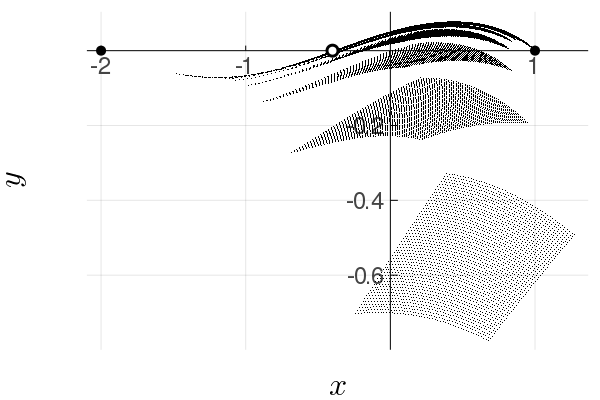

In [18]:
N = 51;
xy_0_mat = [ [i, j] for i in range(1,2,length=N), j in range(-2,-1,length=N)]
xy_mat = xy_0_mat
p = (1.0,1.0,-2.0,2.0,4.0)
tspan = (0.0,0.2)
pl = plot()

for tin in 0.:5.:50.
    tspan = (tin,tin+1.)
    for i in 1:N
        for j in 1:N
            u0 = [xy_mat[i,j][1],xy_mat[i,j][2]]    
            prob = ODEProblem(f!,u0,tspan,p)
            sol = solve(prob)
            pl = scatter!([sol[end][1]], [sol[end][2]], legend=false, markersize=0.1, markercolor=:black)
            xy_mat[i,j] = [sol[end][1],sol[end][2]]
        end
    end
end
pl = scatter!([1,-2],[0,0], marker=(5, :black), framestyle=:origin)
pl = scatter!([-0.4],[0], marker=(5, :white, stroke(3, :black)), framestyle=:origin)
pl = scatter!(xlabel=L"x", ylabel=L"y")
display(pl)

**f)** Definiáljunk egy `main_VezeteknevKeresztnev` nevű függvényt, amely a fenti négyetrácsból kiindulva megoldja a rendszert tetszőleges pontossággal és az **e)** alponthoz hasonlóan ábrát is készít amennyiben a felhasználó azt kívánja. Optimalizáljuk a függvényt, hogy minél gyorsabban végezze el a feladatot! (`BenchmarkTools`)  (*30 pont*)  


* A függvény bemeneti paraméterei:
    - `tol`-pontosság, tolerancia; ez adja meg az eredményünk pontosságát. Mindegyik pontra kiszámítjuk a 
$$v=\sqrt{f_1^2(x,y)+f_2^2(x,y)}=\sqrt{\dot{x}^2+\dot{y}^2}$$
sebességet a fázistérben és ezt átlagoljuk az összes pontra. Amennyiben a megadott pontosság alá esik a sebességek átlaga kilépünk.  
    - `graph`-`Bool` típusú változó(`true`/`false`). Ha `true` akkor ábrát is visszatérít a függvény, ellenkező esetben nem.  
* Amit a függvény visszatérít:  
    * `X` - a kezdeti x értékekhez tartozó végső koordináták (51x51 érték) 
    * `Y` - a kezdeti y értékekhez tartozó végső koordináták (51x51 érték) 
    * `V` - a sebességek az utol
    * `t` - az időintervallum hossza amire futtattunk
    * `pl`- (opcionális) az ábra   
    
    
**Akinek a leggyorsabban fut le a függvény, az értékes pluszpontokra számíthat!**




### Függvények optimizálása

In [19]:
using BenchmarkTools

In [20]:
x = range(-10,10,length=10^4)

-10.0:0.002000200020002:10.0

In [21]:
function derV_v0(x,x1,x2,z1,z2)
    return (1-(tanh((x-x1)^2/z1^2))^2)*2*(x-x1)/z1^2*tanh((x-x2)^2/z2^2) + (1-(tanh((x-x2)^2/z2^2))^2)*2*(x-x2)/z2^2*tanh((x-x1)^2/z1^2)
end

derV_v0 (generic function with 1 method)

In [22]:
@benchmark derV_v0.(x,1,-2,2,4)

BenchmarkTools.Trial: 
  memory estimate:  78.92 KiB
  allocs estimate:  19
  --------------
  minimum time:     981.186 μs (0.00% GC)
  median time:      1.062 ms (0.00% GC)
  mean time:        1.133 ms (0.65% GC)
  maximum time:     4.554 ms (65.96% GC)
  --------------
  samples:          4398
  evals/sample:     1

In [23]:
function derV_v1(x,x1=1,x2=-2,z1=2,z2=4)
    return (1-(tanh((x-x1)^2/z1^2))^2)*2*(x-x1)/z1^2*tanh((x-x2)^2/z2^2) + (1-(tanh((x-x2)^2/z2^2))^2)*2*(x-x2)/z2^2*tanh((x-x1)^2/z1^2)
end

derV_v1 (generic function with 5 methods)

In [24]:
@benchmark derV_v1.(x)

BenchmarkTools.Trial: 
  memory estimate:  78.39 KiB
  allocs estimate:  5
  --------------
  minimum time:     1.003 ms (0.00% GC)
  median time:      1.059 ms (0.00% GC)
  mean time:        1.143 ms (0.64% GC)
  maximum time:     4.668 ms (63.32% GC)
  --------------
  samples:          4357
  evals/sample:     1

In [25]:
function derV_v2(x::Float64,x1::Float64=1.,x2::Float64=-2.,z1::Float64=2.,z2::Float64=4.)::Float64
    return (1-(tanh((x-x1)^2/z1^2))^2)*2*(x-x1)/z1^2*tanh((x-x2)^2/z2^2) + (1-(tanh((x-x2)^2/z2^2))^2)*2*(x-x2)/z2^2*tanh((x-x1)^2/z1^2)
end

derV_v2 (generic function with 5 methods)

In [26]:
@benchmark derV_v2.(x)

BenchmarkTools.Trial: 
  memory estimate:  78.39 KiB
  allocs estimate:  5
  --------------
  minimum time:     945.398 μs (0.00% GC)
  median time:      974.208 μs (0.00% GC)
  mean time:        981.635 μs (0.64% GC)
  maximum time:     3.371 ms (68.36% GC)
  --------------
  samples:          5085
  evals/sample:     1

In [27]:
function derV_v3(x::Float64)::Float64
    return (1. -(tanh((x-1.)^2/4.))^2)*2*(x-1.)/4.0*tanh((x+2.)^2/16.) + (1. -(tanh((x+2.)^2/16.))^2.)*2*(x+2.)/16.0*tanh((x-1.)^2/4.)
end

derV_v3 (generic function with 1 method)

In [28]:
@benchmark derV_v3.(x)

BenchmarkTools.Trial: 
  memory estimate:  78.39 KiB
  allocs estimate:  5
  --------------
  minimum time:     954.356 μs (0.00% GC)
  median time:      959.634 μs (0.00% GC)
  mean time:        980.578 μs (0.66% GC)
  maximum time:     3.149 ms (66.67% GC)
  --------------
  samples:          5088
  evals/sample:     1

In [29]:
function derV_v4(x::Float64)::Float64
    g1 = tanh((x-1.)^2/4.)
    g2 = tanh((x+2.)^2/16.)
    return (1.0-g1^2)*(x-1.)*g2 + (1.0-g2^2)*(x+2.)/2.0*g1
end

derV_v4 (generic function with 1 method)

In [30]:
@benchmark derV_v4.(x)

BenchmarkTools.Trial: 
  memory estimate:  78.39 KiB
  allocs estimate:  5
  --------------
  minimum time:     530.563 μs (0.00% GC)
  median time:      531.615 μs (0.00% GC)
  mean time:        557.030 μs (1.24% GC)
  maximum time:     4.669 ms (82.70% GC)
  --------------
  samples:          8936
  evals/sample:     1

In [31]:
function derV_v5(x)
    g1 = tanh((x-1)^2/4)
    g2 = tanh((x+2)^2/16)
    return (1-g1^2)*(x-1)/2*g2 + (1-g2^2)*(x+2)/8*g1
end

derV_v5 (generic function with 1 method)

In [32]:
@benchmark derV_v5.(x)

BenchmarkTools.Trial: 
  memory estimate:  78.39 KiB
  allocs estimate:  5
  --------------
  minimum time:     516.324 μs (0.00% GC)
  median time:      531.808 μs (0.00% GC)
  mean time:        551.467 μs (1.30% GC)
  maximum time:     4.646 ms (87.10% GC)
  --------------
  samples:          9030
  evals/sample:     1

In [33]:
function derV_v6(x)
    g1 = tanh((x-1)^2*0.25)
    g2 = tanh((x+2)^2*0.0625)
    return (1-g1^2)*(x-1)*0.5*g2 + (1-g2^2)*(x+2)*0.125*g1
end

derV_v6 (generic function with 1 method)

In [34]:
@benchmark derV_v6.(x)

BenchmarkTools.Trial: 
  memory estimate:  78.39 KiB
  allocs estimate:  5
  --------------
  minimum time:     502.313 μs (0.00% GC)
  median time:      517.128 μs (0.00% GC)
  mean time:        525.983 μs (1.20% GC)
  maximum time:     2.512 ms (77.73% GC)
  --------------
  samples:          9479
  evals/sample:     1

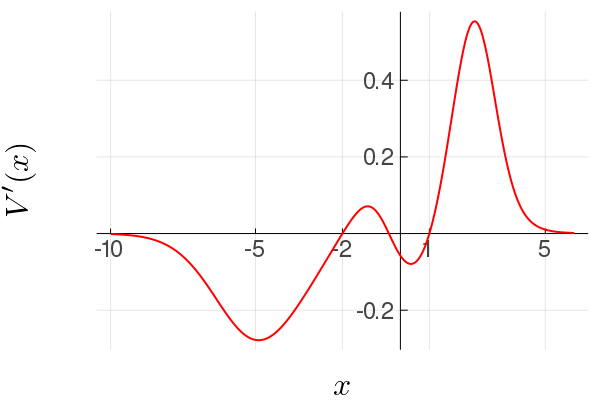

In [35]:
x_arr = -10:0.01:6
plot(x_arr,derV_v5.(x_arr), lw=2, color=:red)
plot!(xlabel=L"x", ylabel=L"V'(x)", xticks=[-10,-5,-2,0,1,5], legend=nothing, framestyle=:origin)

### ODE optimizálása

In [36]:
using DifferentialEquations; using ParameterizedFunctions; 

**v1: in-place függvény**

In [37]:
function f_v1!(du,u,p,t)
    du[1] = u[2]
    du[2] = -u[2] - derV_v5(u[1])
end

f_v1! (generic function with 1 method)

In [38]:
tspan = (0.0,20)
p = []
u0 = [rand(-5:0.001:3),rand(-3:0.001:3)]
prob_v1 = ODEProblem(f_v1!,u0,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 20.0)
u0: [-2.892, 1.144]

In [39]:
@benchmark solve(prob_v1, saveat=0.01)

BenchmarkTools.Trial: 
  memory estimate:  310.73 KiB
  allocs estimate:  2179
  --------------
  minimum time:     298.071 μs (0.00% GC)
  median time:      311.603 μs (0.00% GC)
  mean time:        376.302 μs (12.91% GC)
  maximum time:     4.413 ms (90.38% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [40]:
@benchmark solve(prob_v1, Tsit5(), saveat=0.01)

BenchmarkTools.Trial: 
  memory estimate:  273.00 KiB
  allocs estimate:  2081
  --------------
  minimum time:     261.323 μs (0.00% GC)
  median time:      270.783 μs (0.00% GC)
  mean time:        326.995 μs (13.18% GC)
  maximum time:     4.190 ms (91.36% GC)
  --------------
  samples:          10000
  evals/sample:     1

**v2: @ode_def makró + segédváltozók**

In [41]:
f_v2! = @ode_def Lienard begin
    g1 = tanh((x-1)^2/4)
    g2 = tanh((x+2)^2/16)
    dx = y
    dy = -y - (1-g1^2)*(x-1)/2*g2 - (1-g2^2)*(x+2)/8*g1
end

┌ Warning: Symbolic calculations could not initiate. Likely there's a function which is not differentiable by SymEngine.
└ @ ParameterizedFunctions /home/sbulcsu/.julia/packages/ParameterizedFunctions/WcTrd/src/ode_def_opts.jl:244


(::Lienard{getfield(Main, Symbol("##24#25")),Nothing,Nothing,Nothing,Nothing,Nothing,Any,Any}) (generic function with 2 methods)

In [42]:
tspan = (0.0,20)
p = []
u0 = [rand(-5:0.001:3),rand(-3:0.001:3)]
prob_v2 = ODEProblem(f_v2!,u0,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 20.0)
u0: [-2.027, -1.265]

In [43]:
@benchmark solve(prob_v2, Tsit5(), saveat=0.01)

BenchmarkTools.Trial: 
  memory estimate:  272.98 KiB
  allocs estimate:  2080
  --------------
  minimum time:     263.240 μs (0.00% GC)
  median time:      342.916 μs (0.00% GC)
  mean time:        445.971 μs (13.17% GC)
  maximum time:     8.439 ms (91.39% GC)
  --------------
  samples:          10000
  evals/sample:     1

**v3: @ode_def makró**

In [44]:
f_v3! = @ode_def Lienard begin
    dx = y
    dy = -y - (1-(tanh((x-1)^2/4))^2)*(x-1)/2*(tanh((x+2)^2/16)) - (1-(tanh((x+2)^2/16))^2)*(x+2)/8*(tanh((x-1)^2/4))
end

(::Lienard{getfield(Main, Symbol("##27#31")),getfield(Main, Symbol("##28#32")),getfield(Main, Symbol("##29#33")),Nothing,Nothing,getfield(Main, Symbol("##30#34")),Expr,Expr}) (generic function with 2 methods)

In [45]:
tspan = (0.0,20)
p = []
u0 = [rand(-5:0.001:3),rand(-3:0.001:3)]
prob_v3 = ODEProblem(f_v3!,u0,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 20.0)
u0: [-3.356, -2.469]

In [46]:
@benchmark solve(prob_v3, Tsit5(), saveat=0.01)

BenchmarkTools.Trial: 
  memory estimate:  272.98 KiB
  allocs estimate:  2080
  --------------
  minimum time:     270.986 μs (0.00% GC)
  median time:      283.099 μs (0.00% GC)
  mean time:        343.194 μs (13.14% GC)
  maximum time:     5.044 ms (93.56% GC)
  --------------
  samples:          10000
  evals/sample:     1

**v4: @SVector makró - statikus memóriafoglalással**

In [47]:
using StaticArrays

In [48]:
function f_v4(u,p,t)
    dx = u[2]
    dy = -u[2] - derV_v5(u[1])
    @SVector [dx, dy]
end

f_v4 (generic function with 1 method)

In [49]:
tspan = (0.0,20)
p = []
u0 = @SVector [rand(-5:0.001:3),rand(-3:0.001:3)]
prob_v4 = ODEProblem(f_v4,u0,tspan,p)

ODEProblem with uType SArray{Tuple{2},Float64,1,2} and tType Float64. In-place: false
timespan: (0.0, 20.0)
u0: [-2.55, -2.744]

In [50]:
@benchmark solve(prob_v4, Tsit5(), saveat=0.01)

BenchmarkTools.Trial: 
  memory estimate:  99.41 KiB
  allocs estimate:  57
  --------------
  minimum time:     208.628 μs (0.00% GC)
  median time:      219.863 μs (0.00% GC)
  mean time:        233.966 μs (4.73% GC)
  maximum time:     3.219 ms (90.59% GC)
  --------------
  samples:          10000
  evals/sample:     1

### Solve optimizálása

In [51]:
@benchmark solve(prob_v1, Tsit5(), save_everystep=false, save_start = false)

BenchmarkTools.Trial: 
  memory estimate:  5.52 KiB
  allocs estimate:  57
  --------------
  minimum time:     13.431 μs (0.00% GC)
  median time:      14.668 μs (0.00% GC)
  mean time:        16.806 μs (7.33% GC)
  maximum time:     6.317 ms (99.37% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [52]:
@benchmark solve(prob_v2, Tsit5(), save_everystep=false, save_start = false)

BenchmarkTools.Trial: 
  memory estimate:  5.52 KiB
  allocs estimate:  57
  --------------
  minimum time:     13.180 μs (0.00% GC)
  median time:      14.434 μs (0.00% GC)
  mean time:        16.548 μs (7.41% GC)
  maximum time:     6.278 ms (99.43% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [53]:
@benchmark solve(prob_v3, Tsit5(), save_everystep=false, save_start = false)

BenchmarkTools.Trial: 
  memory estimate:  5.52 KiB
  allocs estimate:  57
  --------------
  minimum time:     20.419 μs (0.00% GC)
  median time:      21.641 μs (0.00% GC)
  mean time:        23.793 μs (5.13% GC)
  maximum time:     6.163 ms (99.32% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [54]:
@benchmark solve(prob_v4, Tsit5(), save_everystep=false, save_start = false)

BenchmarkTools.Trial: 
  memory estimate:  3.98 KiB
  allocs estimate:  38
  --------------
  minimum time:     10.166 μs (0.00% GC)
  median time:      11.089 μs (0.00% GC)
  mean time:        12.507 μs (4.23% GC)
  maximum time:     5.328 ms (99.39% GC)
  --------------
  samples:          10000
  evals/sample:     1

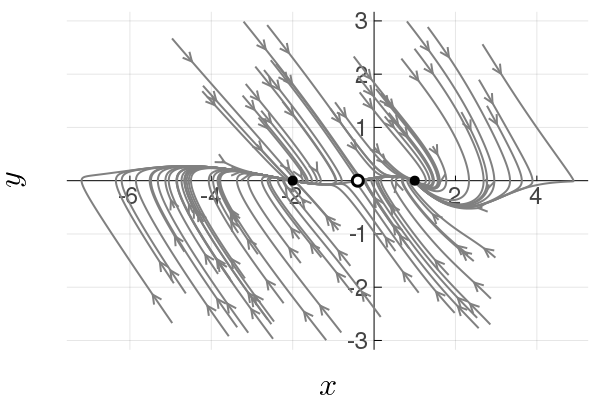

In [55]:
p = ()
pl = plot()
for i in 1:100
    # first segment of the trajectories - before the arrow
    tspan = (0.0,0.2)
    u0 = @SVector [rand(-5:0.001:3),rand(-3:0.001:3)]
    prob = ODEProblem(f_v4,u0,tspan,p)
    sol = solve(prob, saveat=0.01)
    pl = plot!(sol[1,:], sol[2,:], legend=false, color=:grey, lw=1.5, arrow=:arrow)
    # second segment of the trajectories - after the arrow
    tspan = (0.0,50.0)
    u0 = @SVector [sol[1,end],sol[2,end]]
    prob = ODEProblem(f_v4,u0,tspan,p)
    sol = solve(prob, saveat=0.01)
    pl = plot!(sol[1,:], sol[2,:], legend=false, color=:grey, lw=1.5, )
end
pl = plot!([1,-2],[0,0], seriestype=:scatter, marker=(5, :black), framestyle=:origin)
pl = plot!([-0.4],[0], seriestype=:scatter, marker=(5, :white, stroke(3, :black)), framestyle=:origin)
pl = plot!(xlabel=L"x", ylabel=L"y")
display(pl)

### Sok kezdőérték beállítása: párhuzamosítás nélkül

In [56]:
function ensemble_sim1(N)
    xy_mat = [ [i, j] for i in range(1.,2.,length=N), j in range(-2.,-1.,length=N)]
    
    u0 = @SVector [0., 0.]
    p = ()
    tspan = (0.0,20)
    prob_v4 = ODEProblem(f_v4,u0,tspan,p)

    for i in 1:N
        for j in 1:N
            prob_v4 = remake(prob_v4, u0=@SVector [xy_mat[i,j][1],xy_mat[i,j][2]])
            sol = solve(prob_v4, Tsit5(), save_everystep=false, save_start=false)
            #xy_mat[i,j] = [sol[end][1],sol[end][2]]
        end
    end
end

ensemble_sim1 (generic function with 1 method)

In [57]:
@benchmark ensemble_sim1(51)

BenchmarkTools.Trial: 
  memory estimate:  10.72 MiB
  allocs estimate:  106991
  --------------
  minimum time:     28.602 ms (0.00% GC)
  median time:      33.178 ms (0.00% GC)
  mean time:        32.262 ms (7.02% GC)
  maximum time:     47.267 ms (11.10% GC)
  --------------
  samples:          156
  evals/sample:     1

In [58]:
function ensemble_sim2(N)
    xy_mat = [ [i, j] for i in range(1.,2.,length=N), j in range(-2.,-1.,length=N)]
    
    u0 = [0., 0.]
    p = ()
    tspan = (0.0,20.)
    prob_v3 = ODEProblem(f_v3!,u0,tspan,p)
   
    for i in 1:N
        for j in 1:N
            prob_v3 = remake(prob_v3, u0=[xy_mat[i,j][1],xy_mat[i,j][2]])
            sol = solve(prob_v3, Tsit5(), save_everystep=false, save_start=false)
            #xy_mat[i,j] = [sol[end][1],sol[end][2]]
        end
    end
end

ensemble_sim2 (generic function with 1 method)

In [59]:
@benchmark ensemble_sim2(51)

BenchmarkTools.Trial: 
  memory estimate:  14.78 MiB
  allocs estimate:  166468
  --------------
  minimum time:     49.747 ms (0.00% GC)
  median time:      54.633 ms (7.86% GC)
  mean time:        54.157 ms (5.39% GC)
  maximum time:     64.217 ms (7.30% GC)
  --------------
  samples:          93
  evals/sample:     1

In [60]:
function ensemble_sim3(N)
    xy_mat = [ [i, j] for i in range(1.,2.,length=N), j in range(-2.,-1.,length=N)]
    
    u0 = [0., 0.]
    p = ()
    tspan = (0.0,20.)
    prob_v3 = ODEProblem(f_v3!,u0,tspan,p)
   
    for i in 1:N
        for j in 1:N
            @. prob_v3.u0 = [xy_mat[i,j][1],xy_mat[i,j][2]]    
            sol = solve(prob_v3, Tsit5(), save_everystep=false, save_start=false)
            #xy_mat[i,j] = [sol[end][1],sol[end][2]]
        end
    end
end

ensemble_sim3 (generic function with 1 method)

In [61]:
@benchmark ensemble_sim3(51)

BenchmarkTools.Trial: 
  memory estimate:  14.70 MiB
  allocs estimate:  166468
  --------------
  minimum time:     50.046 ms (0.00% GC)
  median time:      54.972 ms (7.88% GC)
  mean time:        55.036 ms (5.52% GC)
  maximum time:     70.060 ms (11.60% GC)
  --------------
  samples:          91
  evals/sample:     1

In [62]:
const N=51

ErrorException: cannot declare N constant; it already has a value

In [63]:
xy_mat = [ [i, j] for i in range(1.,2.,length=N), j in range(-2.,-1.,length=N)]

51×51 Array{Array{Float64,1},2}:
 [1.0, -2.0]   [1.0, -1.98]   [1.0, -1.96]   …  [1.0, -1.02]   [1.0, -1.0] 
 [1.02, -2.0]  [1.02, -1.98]  [1.02, -1.96]     [1.02, -1.02]  [1.02, -1.0]
 [1.04, -2.0]  [1.04, -1.98]  [1.04, -1.96]     [1.04, -1.02]  [1.04, -1.0]
 [1.06, -2.0]  [1.06, -1.98]  [1.06, -1.96]     [1.06, -1.02]  [1.06, -1.0]
 [1.08, -2.0]  [1.08, -1.98]  [1.08, -1.96]     [1.08, -1.02]  [1.08, -1.0]
 [1.1, -2.0]   [1.1, -1.98]   [1.1, -1.96]   …  [1.1, -1.02]   [1.1, -1.0] 
 [1.12, -2.0]  [1.12, -1.98]  [1.12, -1.96]     [1.12, -1.02]  [1.12, -1.0]
 [1.14, -2.0]  [1.14, -1.98]  [1.14, -1.96]     [1.14, -1.02]  [1.14, -1.0]
 [1.16, -2.0]  [1.16, -1.98]  [1.16, -1.96]     [1.16, -1.02]  [1.16, -1.0]
 [1.18, -2.0]  [1.18, -1.98]  [1.18, -1.96]     [1.18, -1.02]  [1.18, -1.0]
 [1.2, -2.0]   [1.2, -1.98]   [1.2, -1.96]   …  [1.2, -1.02]   [1.2, -1.0] 
 [1.22, -2.0]  [1.22, -1.98]  [1.22, -1.96]     [1.22, -1.02]  [1.22, -1.0]
 [1.24, -2.0]  [1.24, -1.98]  [1.24, -1.96]     [1.24, 

In [64]:
xy_mat[:]

2601-element Array{Array{Float64,1},1}:
 [1.0, -2.0] 
 [1.02, -2.0]
 [1.04, -2.0]
 [1.06, -2.0]
 [1.08, -2.0]
 [1.1, -2.0] 
 [1.12, -2.0]
 [1.14, -2.0]
 [1.16, -2.0]
 [1.18, -2.0]
 [1.2, -2.0] 
 [1.22, -2.0]
 [1.24, -2.0]
 ⋮           
 [1.78, -1.0]
 [1.8, -1.0] 
 [1.82, -1.0]
 [1.84, -1.0]
 [1.86, -1.0]
 [1.88, -1.0]
 [1.9, -1.0] 
 [1.92, -1.0]
 [1.94, -1.0]
 [1.96, -1.0]
 [1.98, -1.0]
 [2.0, -1.0] 

In [65]:
xy_mat[52]

2-element Array{Float64,1}:
  1.0 
 -1.98

In [66]:
function ensemble_sim4(N)
    xy_mat = [ [i, j] for i in range(1.,2.,length=N), j in range(-2.,-1.,length=N)]
   
    function prob_func(prob,i,repeat)
      @. prob.u0 = xy_mat[i]
      prob
    end
    
    function output_func(sol,i) 
        return (sol[end],false)
    end
    
    u0 = [0., 0.]
    p = ()
    tspan = (0.0,20.)
    prob_v3 = ODEProblem(f_v3!,u0,tspan,p)
    ens_prob_v3 = EnsembleProblem(prob_v3; output_func=output_func, prob_func=prob_func)
    
    sim = solve(ens_prob_v3, Tsit5(), EnsembleThreads(), trajectories=N*N)
    return sim
end

ensemble_sim4 (generic function with 1 method)

In [67]:
sim = ensemble_sim4(51)

EnsembleSolution Solution of length 2601 with uType:
Array{Float64,1}

In [68]:
sim[2601]

2-element Array{Float64,1}:
 0.9993251230542513    
 0.00030957346245303496

In [69]:
@benchmark ensemble_sim4(51)

BenchmarkTools.Trial: 
  memory estimate:  398.74 MiB
  allocs estimate:  2799999
  --------------
  minimum time:     398.077 ms (0.00% GC)
  median time:      411.685 ms (0.00% GC)
  mean time:        511.590 ms (19.66% GC)
  maximum time:     957.209 ms (55.33% GC)
  --------------
  samples:          10
  evals/sample:     1

### Sok kezdőérték beállítása: párhuzamosítással!

* párhuzamosításokról lásd a [példákat](https://docs.juliadiffeq.org/latest/features/ensemble/)

In [70]:
function ensemble_sim5(N)
    xy_mat = [ [i, j] for i in range(1.,2.,length=N), j in range(-2.,-1.,length=N)]
   
    function prob_func(prob,i,repeat)
      prob = remake(prob, u0=xy_mat[i])
      prob
    end
    
    function output_func(sol,i) 
        return (sol[end],false)
    end
    
    u0 = [0., 0.]
    p = ()
    tspan = (0.0,20)
    prob_v3 = ODEProblem(f_v3!,u0,tspan,p)
    ens_prob_v3 = EnsembleProblem(prob_v3; output_func=output_func, prob_func=prob_func)
    
    sim = solve(ens_prob_v3, Tsit5(), EnsembleThreads(), trajectories=N*N)
    return sim
end

ensemble_sim5 (generic function with 1 method)

In [71]:
@benchmark ensemble_sim5(51)

BenchmarkTools.Trial: 
  memory estimate:  397.68 MiB
  allocs estimate:  2809644
  --------------
  minimum time:     425.960 ms (0.00% GC)
  median time:      458.184 ms (0.00% GC)
  mean time:        540.962 ms (18.47% GC)
  maximum time:     916.628 ms (56.08% GC)
  --------------
  samples:          10
  evals/sample:     1

In [72]:
SVector{2}(xy_mat[1])

2-element SArray{Tuple{2},Float64,1,2}:
  1.0
 -2.0

In [73]:
function ensemble_sim6(N)
    xy_mat = [ [i, j] for i in range(1.,2.,length=N), j in range(-2.,-1.,length=N)]
   
    function prob_func(prob,i,repeat)
      prob = remake(prob, u0=SVector{2}(xy_mat[i]))
      prob
    end
    
    function output_func(sol,i) 
        return (sol[end],false)
    end
    
    u0 = SVector{2}([0., 0.])
    p = ()
    tspan = (0.0,20.)
    prob_v4 = ODEProblem(f_v4,u0,tspan,p)
    ens_prob_v4 = EnsembleProblem(prob_v4; output_func=output_func, prob_func=prob_func)
    
    sim = solve(ens_prob_v4, Tsit5(), EnsembleThreads(), trajectories=N*N)
    return sim
end

ensemble_sim6 (generic function with 1 method)

In [74]:
sim = ensemble_sim6(51)

EnsembleSolution Solution of length 2601 with uType:
SArray{Tuple{2},Float64,1,2}

In [75]:
using DifferentialEquations.EnsembleAnalysis

In [76]:
sim[2601][1]

0.9993251230542513

In [78]:
@benchmark ensemble_sim6(51)

BenchmarkTools.Trial: 
  memory estimate:  21.28 MiB
  allocs estimate:  185864
  --------------
  minimum time:     14.685 ms (0.00% GC)
  median time:      14.996 ms (0.00% GC)
  mean time:        25.568 ms (37.76% GC)
  maximum time:     993.888 ms (98.33% GC)
  --------------
  samples:          196
  evals/sample:     1

### Teljes függvény párhuzamosítás nélkül

* statikus tömbök foglalása a `@SVector`  makróval a `stack` memóriában: [StaticArrays.jl](https://juliaarrays.github.io/StaticArrays.jl/stable/)
* integrálási algoritmus kiválasztása, mentések számának csökkentése: [Common Solver Options](https://docs.juliadiffeq.org/latest/basics/common_solver_opts/#Common-Solver-Options-1) 

In [79]:
function main_SandorBulcsu_v1(tol::Float64, graph::Bool=false)
    # using Plots; using LaTeXStrings;
    # using DifferentialEquations; using ParameterizedFunctions; using StaticArrays; using BenchmarkTools
    # Plots.reset_defaults(); theme(:default); Plots.scalefontsizes(2.); Plots.default(:fontfamily, "serif")
    # gr(fmt=:png) # Make it a PNG instead of an SVG since there's a lot of points!
    
    x_arr = [ i for i in range(1.,2.,length=N), j in range(-2.,-1.,length=N)]
    y_arr = [ j for i in range(1.,2.,length=N), j in range(-2.,-1.,length=N)]
    v_arr = Array{Float64}(undef, N*N)
    v = tol
    t = 0.0
    
    if graph
        pl = scatter()
    end
    
    function derV_v5(x)
        g1 = tanh((x-1)^2/4)
        g2 = tanh((x+2)^2/16)
        return (1-g1^2)*(x-1)/2*g2 + (1-g2^2)*(x+2)/8*g1
    end
    
    function f_v4(u,p,t)
        dx = u[2]
        dy = -u[2] - derV_v5(u[1])
        @SVector [dx, dy]
    end
    
    function speed(u1, u2)
        return sqrt(u2^2 + (u2 + derV_v5(u1))^2)
    end
    
    u0 = @SVector [0., 0.]
    p = ()
    tspan = (0.0,1.0)
    prob_v4 = ODEProblem(f_v4,u0,tspan,p)

    while v>=tol
        for i in 1:N^2
            prob_v4 = remake(prob_v4, u0=@SVector [x_arr[i],y_arr[i]])
            sol = solve(prob_v4, Tsit5(), save_everystep=false, save_start=false)
            
            if graph
                pl = scatter!([sol[end][1]], [sol[end][2]], legend=false, markersize=0.1, markercolor=:black)
            end    
            x_arr[i] = sol[end][1]
            y_arr[i] = sol[end][2]
            v_arr[i] = speed(x_arr[i], y_arr[i])
            v += v_arr[i]
        end
        v /= N*N
        t += 1.0
    end
    if graph
        pl = scatter!([1,-2],[0,0], marker=(5, :black), framestyle=:origin)
        pl = scatter!([-0.4],[0], marker=(5, :white, stroke(3, :black)), framestyle=:origin)
        pl = scatter!(xlabel=L"x", ylabel=L"y")
        return x_arr, y_arr, t, pl
    else
        return x_arr, y_arr, t
    end
end

main_SandorBulcsu_v1 (generic function with 2 methods)

In [80]:
x, y, t, pl = main_SandorBulcsu_v1(0.5*1e-1, true)

([-0.987475 -0.963065 … 0.209512 0.230397; -0.962197 -0.937651 … 0.229259 0.249868; … ; 0.0747144 0.0939729 … 0.798452 0.809069; 0.08981 0.108854 … 0.804685 0.81517], [-0.0913112 -0.0894013 … 0.0536621 0.0550392; -0.0896303 -0.0875785 … 0.0546139 0.0558674; … ; 0.0251273 0.0268223 … 0.00962067 0.00773456; 0.0260806 0.0276904 … 0.00782888 0.00591917], 4.0, Plot{Plots.GRBackend() n=10406})

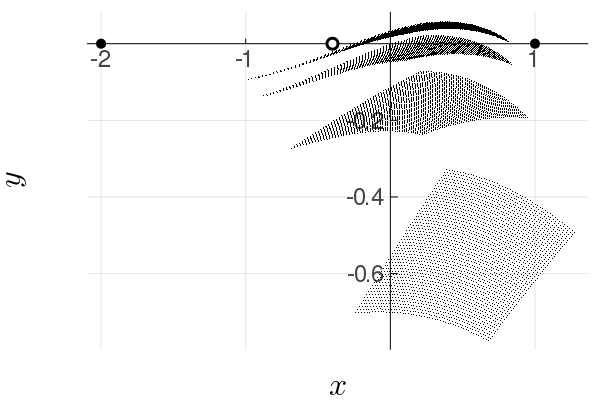

In [81]:
display(pl)

In [82]:
@benchmark main_SandorBulcsu_v1(0.5*1e-1)

BenchmarkTools.Trial: 
  memory estimate:  45.43 MiB
  allocs estimate:  589357
  --------------
  minimum time:     63.861 ms (0.00% GC)
  median time:      73.104 ms (0.00% GC)
  mean time:        82.904 ms (10.57% GC)
  maximum time:     619.537 ms (86.31% GC)
  --------------
  samples:          61
  evals/sample:     1

### Teljes függvény párhuzamosítással!

 * hasznos trükkök sokaságok vizsgálatához: [Parallel Ensemble Simulations](https://docs.juliadiffeq.org/latest/features/ensemble/#Parallel-Ensemble-Simulations-1)

In [83]:
function main_SandorBulcsu_v2(tol::Float64, graph::Bool=false)
    # using Plots; using LaTeXStrings;
    # using DifferentialEquations; using ParameterizedFunctions; using StaticArrays; using BenchmarkTools
    # Plots.reset_defaults(); theme(:default); Plots.scalefontsizes(2.); Plots.default(:fontfamily, "serif")
    # gr(fmt=:png) # Make it a PNG instead of an SVG since there's a lot of points!
    
    x_arr = [ i for i in range(1.,2.,length=N), j in range(-2.,-1.,length=N)]
    y_arr = [ j for i in range(1.,2.,length=N), j in range(-2.,-1.,length=N)]
    v_arr = Array{Float64}(undef, N*N)
    v = tol
    t = 0.0
    
    if graph
        pl = scatter()
    end
    
    function derV_v5(x)
        g1 = tanh((x-1)^2/4)
        g2 = tanh((x+2)^2/16)
        return (1-g1^2)*(x-1)/2*g2 + (1-g2^2)*(x+2)/8*g1
    end
    
    function f_v4(u,p,t)
        dx = u[2]
        dy = -u[2] - derV_v5(u[1])
        @SVector [dx, dy]
    end
    
    function speed(u1, u2)
        return sqrt(u2^2 + (u2 + derV_v5(u1))^2)
    end
    
    function prob_func(prob,i,repeat)
      prob = remake(prob, u0=SVector{2}(x_arr[i], y_arr[i]))
      prob
    end
    
    function output_func(sol,i) 
        return (sol[end],false)
    end
    
    u0 = SVector{2}([0., 0.])
    p = ()
    tspan = (0.0,1.0)
    prob_v4 = ODEProblem(f_v4,u0,tspan,p)
    ens_prob_v4 = EnsembleProblem(prob_v4; output_func=output_func, prob_func=prob_func)
    
    

    while v>=tol
        sim = solve(ens_prob_v4, Tsit5(), EnsembleThreads(), trajectories=N*N)
        
        for i in 1:N*N
            if graph
                pl = scatter!([sim[i][1]], [sim[i][2]], legend=false, markersize=0.1, markercolor=:black)
            end    
            x_arr[i] = sim[i][1]
            y_arr[i] = sim[i][2]
            v_arr[i] = speed(sim[i][1], sim[i][2])
            v += v_arr[i]
        end
        t += 1.0
        v /= N*N
    end
    if graph
        pl = scatter!([1,-2],[0,0], marker=(5, :black), framestyle=:origin)
        pl = scatter!([-0.4],[0], marker=(5, :white, stroke(3, :black)), framestyle=:origin)
        pl = scatter!(xlabel=L"x", ylabel=L"y")
        return x_arr, y_arr, t, pl
    else
        return x_arr, y_arr, t
    end
end

main_SandorBulcsu_v2 (generic function with 2 methods)

In [84]:
x, y, t, pl = main_SandorBulcsu_v2(0.5*1e-1, true)

([-0.987475 -0.963065 … 0.209512 0.230397; -0.962197 -0.937651 … 0.229259 0.249868; … ; 0.0747144 0.0939729 … 0.798452 0.809069; 0.08981 0.108854 … 0.804685 0.81517], [-0.0913112 -0.0894013 … 0.0536621 0.0550392; -0.0896303 -0.0875785 … 0.0546139 0.0558674; … ; 0.0251273 0.0268223 … 0.00962067 0.00773456; 0.0260806 0.0276904 … 0.00782888 0.00591917], 4.0, Plot{Plots.GRBackend() n=10406})

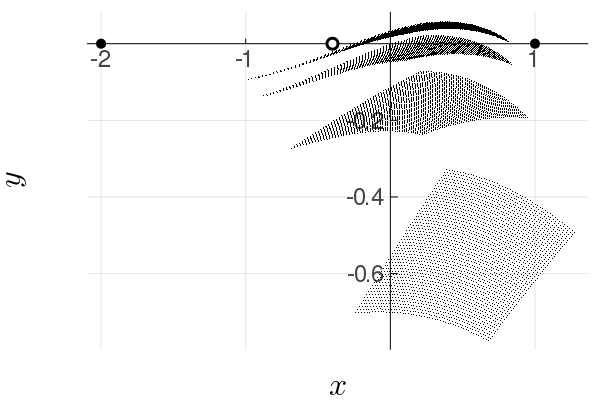

In [85]:
display(pl)

In [86]:
@benchmark main_SandorBulcsu_v2(0.5*1e-1)

BenchmarkTools.Trial: 
  memory estimate:  56.23 MiB
  allocs estimate:  564732
  --------------
  minimum time:     32.474 ms (0.00% GC)
  median time:      34.230 ms (0.00% GC)
  mean time:        64.925 ms (43.76% GC)
  maximum time:     1.185 s (96.66% GC)
  --------------
  samples:          77
  evals/sample:     1